# 이미지 세그멘테이션(Image Segmentation)

## - 정의
 - 이미지 세그멘테이션(Image Segmentation)은 컴퓨터 비전의 주요 작업 중 하나로, 이미지를 더 작은 부분이나 객체로 나누어 각 부분이 의미를 가지도록 만드는 과정입니다. 이미지에서 픽셀 단위로 정보를 분석하여 각 픽셀에 레이블을 할당합니다.

## - 이미지 세그멘테이션의 종류
1. Semantic Segmentation (의미론적 세그멘테이션)
- 목적: 이미지 내 모든 픽셀을 특정 클래스(예: 도로, 사람, 나무 등)로 분류.
- 특징: 같은 클래스에 속하는 객체를 하나로 간주하며, 서로 다른 객체를 구분하지 않음.
- 예시: 여러 사람이 찍힌 사진에서 모든 사람의 픽셀을 "사람" 클래스에 할당.
- 적용 예: 자율주행차에서 도로, 차량, 보행자 구분.
 <img src ="https://i0.wp.com/cdn-images-1.medium.com/max/850/1*f6Uhb8MI4REGcYKkYM9OUQ.png?ssl=1&w=1280&resize=1280&ssl=1" width="700">
2. Instance Segmentation (인스턴스 세그멘테이션)
- 목적: 같은 클래스 내에서도 각 객체(인스턴스)를 개별적으로 구분.
- 특징: 객체 탐지(Object Detection)에 Semantic Segmentation의 기능을 추가한 것.
- 예시: 여러 사람이 찍힌 사진에서 각 사람을 개별 객체로 인식.
- 적용 예: 의료 영상에서 종양의 위치와 크기 측정. 영상 편집 및 증강 현실(AR) 애플리케이션.
 <img src="https://raw.githubusercontent.com/byeongjokim/byeongjokim.github.io/master/assets/images/YOLACT/segmentation.png" width="700">
3. Panoptic Segmentation (판옵틱 세그멘테이션)
- 목적: Semantic Segmentation과 Instance Segmentation의 조합으로, 모든 픽셀에 레이블을 할당하고, 객체를 개별적으로 구분.
- 특징: 각 픽셀은 고유한 인스턴스에 속하거나 **배경**의 일부로 분류됨.
- 예시: 도시 장면에서 차량, 보행자를 개별적으로 식별하고 배경(예: 도로, 건물 등)을 함께 분류.
- 적용 예:
복잡한 장면 이해가 필요한 로봇 비전 시스템.
 <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*qtZZQJPo6kyZ6u8o" width="700">

## 세그멘테이션의 발전

* R-CNN: https://arxiv.org/abs/1311.2524
  - 객체 탐지에 사용된 초기 모델
  - 주요 객체들을 바운딩 박스로 표현하여 정확히 식별하는게 목표
  - Selective Search를 통해 다양한 크기의 박스를 만들고, region proposal 영역 생성
  - region proposal 영역을 warp하여 표준화된 크기로 변환
  - AlexNet을 개량한 CNN 모델을 이용하고, 마지막 층에 SVM을 통해 객체 분류

 <img src="https://lh6.googleusercontent.com/L-hLr-fL1mBUzKYMtNOeQZgF0CCw1rmE4230m90o-PctazAed_18_3G9f_FI7Qgo-Z5o3Lf_ZuDwC-YcwpyXpasCAq8xkRB2yHxMucN-sSal7SYsPCiWn558XuRUD2F5xP41h5Stb1Q2xmvHVaSH1LQ" width="700">

* Fast R-CNN: https://arxiv.org/abs/1504.08083
  - R-CNN의 단점인 느린 속도를 빠른 속도로 개선
  - ROI(Region of Interest) 풀링을 통해 한 이미지의 subregion에 대한 forward pass 값을 공유
  - R-CNN은 CNN 모델로 image feature를 추출, SVM 모델로 분류, Regressor 모델로 bounding box를 맞추는 작업으로 분류되어 있지만, Fast R-CNN은 하나의 모델로 동작
  - Top layer에 softmax layer를 둬서 CNN 결과를 class로 출력
  - Box regression layer를 softmax layer에 평행하게 두어 bounding box 좌표를 출력

  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*jYDMaYeH-TrcoofDqCdxug.jpeg" width="700" >

* Faster R-CNN: https://arxiv.org/abs/1506.01497
  - Fast R-CNN은 가능성 있는 다양한 bounding box들, 즉 ROI를 생성하는 과정인 selective search가 느려 region proposer에서 병목이 발생
  - 이미지 분류(classification)의 첫 단계인 CNN의 forward pass를 통해 얻어진 feature들을 기반으로 영역을 제안
  - CNN 결과를 selective search 알고리즘 대신 region proposal에 이용

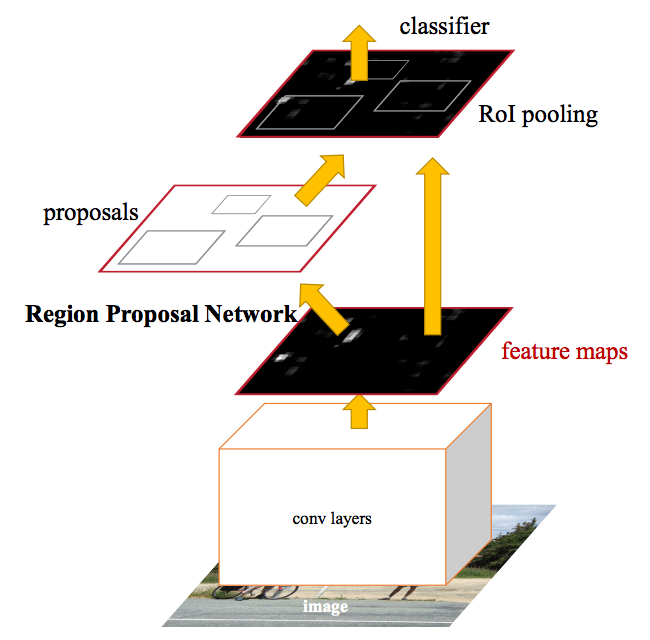

  - k개의 일반적인 비율을 지닌 anchor box를 이용하여 하나의 bounding box 및 score를 이미지의 위치별로 출력

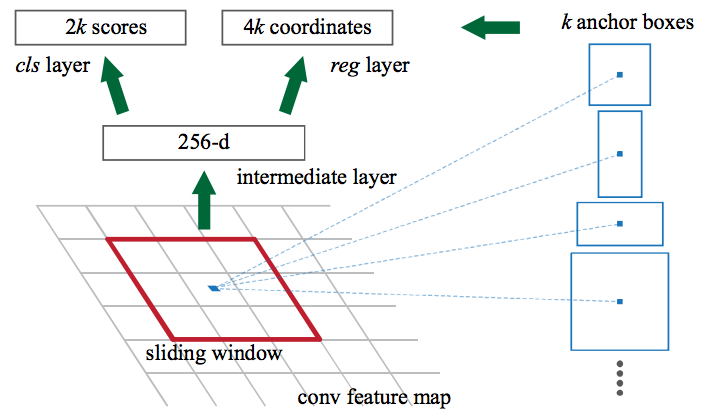

* Mask R-CNN: https://arxiv.org/abs/1703.06870
  - Pixel 레벨의 세그멘테이션
  - RolPool에서 선택된 feature map이 원래 이미지 영역으로 약간 잘못된 정렬이 발생한 부분을 RolAlign을 통해 조정하여 정확하게 정렬
  - Mask R-CNN은 Mask가 생성되면, Faster R-CNN으로 생성된 classification과 bounding box들을 합쳐 정확한 세그멘테이션 가능


# U-Net 기반 세그멘테이션

- 사용된 모델은 수정된 U-Net(https://arxiv.org/abs/1505.04597)
- U자 모양의 구조로 이루어져 있어 'U-Net'이라고 불립니다.
- 두 개의 주요 부분(인코더(축소 경로)
,디코더(확장 경로))으로 구성됩니다.
- Encoder 부분에서는 점진적으로 입력 이미지의 크기를 점차 줄여나가며 이미지의 중요한 특징들을 포착합니다.
- Decoder 부분에서는 축소된 이미지를 점진적으로 원래 크기로 복원하여 세부적인 위치 정보를 다시 살림
- U-Net은 인코더와 디코더 사이에 '건너뛰기 연결(skip connection)'이라는 특별한 연결을 사용하여 인코더에서 얻은 상세 정보를 디코더로 직접 전달합니다.
결과적으로 이미지의 세밀한 부분까지 정확하게 분할할 수 있습니다.
- 적은 양의 학습 데이터로도 좋은 성능을 내는 편입니다.

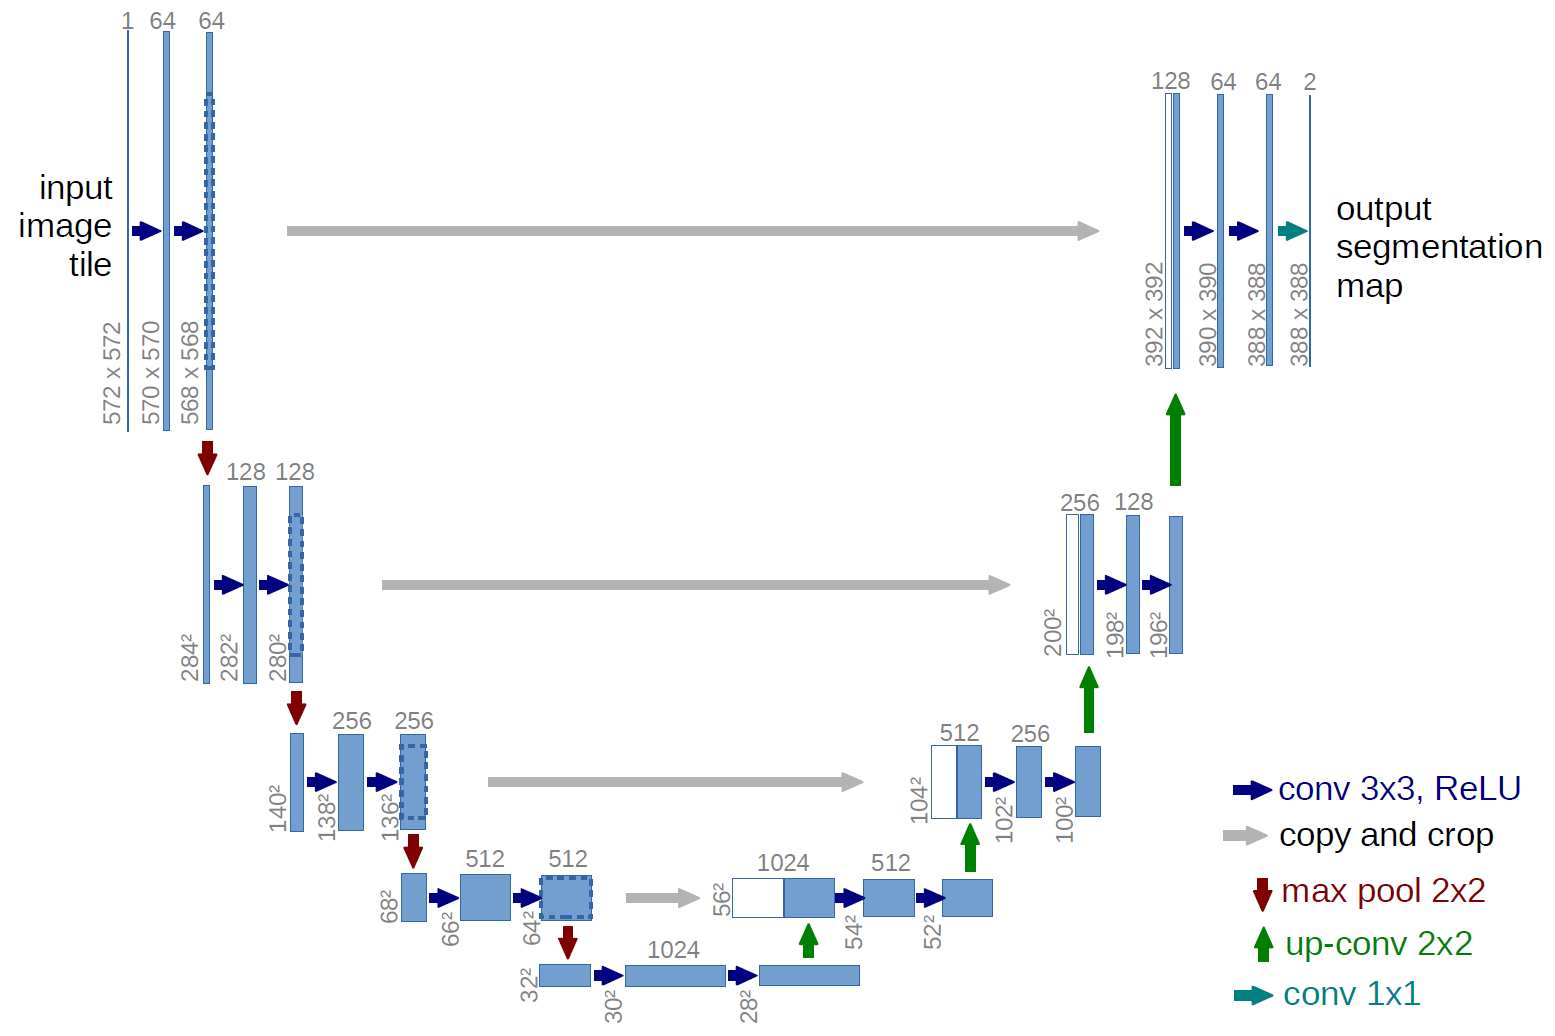

## Oxford-IIIT Pets 데이터셋

- Parkhi *et al*이 만든 [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) 데이터 세트는 영상, 해당 레이블과 픽셀 단위의 마스크로 구성
- 마스크는 기본적으로 각 픽셀의 레이블
- 각 픽셀은 다음 세 가지 범주 중 하나
  *   class 1 : 애완동물이 속한 픽셀
  *   class 2 : 애완동물과 인접한 픽셀
  *   class 3 : 위에 속하지 않는 경우/주변 픽셀

- Images: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
- Annotations: https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

In [1]:
!curl -OL  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!curl -OL https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   340  100   340    0     0    356      0 --:--:-- --:--:-- --:--:--   356
100  755M  100  755M    0     0  22.5M      0  0:00:33  0:00:33 --:--:-- 26.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   345  100   345    0     0    385      0 --:--:-- --:--:-- --:--:--   385
100 18.2M  100 18.2M    0     0  5640k      0  0:00:03  0:00:03 --:--:-- 11.0M


In [2]:
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

In [3]:
import os
import glob
from IPython.display import Image, display
import random
import keras
from skimage import io
import numpy as np
from keras import layers
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

In [4]:
# 이미지가 저장된 디렉터리와 이미지의 주석(레이블)이 저장된 디렉터리 경로를 설정합니다.
input_dir = 'images'
target_dir = 'annotations/trimaps'
# 이미지를 사용할 때 원하는 크기를 지정합니다.
img_size = (160,160)
# 클래스의 수를 정의합니다. (여기서는 세 가지 클래스)
num_classes = 3

# 이미지 파일 경로를 리스트로 가져옵니다 (jpg 파일을 대상으로).
input_img_paths = sorted(glob.glob('images/*jpg'))
# 주석 파일 경로를 리스트로 가져옵니다 (png 파일을 대상으로).
target_img_paths = sorted(glob.glob(f'{target_dir}/*png'))

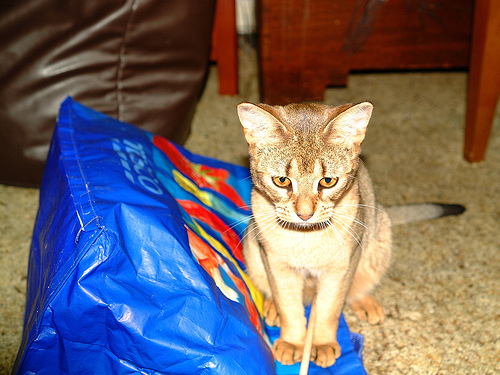

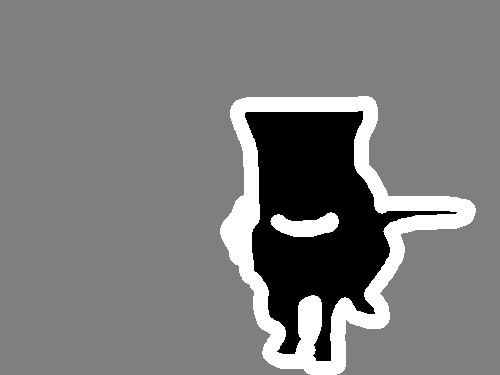

In [5]:
# 주어진 이미지 파일 경로에서 이미지를 시각화합니다.
display(Image(filename=input_img_paths[7]))
# 주석(레이블) 이미지를 불러와 자동 대비 조정 후 시각화합니다.
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[7]))
display(img)

In [6]:
# 주석 이미지 데이터를 NumPy 배열로 불러와 픽셀 값과 유일한 값을 출력하여 확인합니다.
print(io.imread(target_img_paths[7]))
np.unique(io.imread(target_img_paths[7]))

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


array([1, 2, 3], dtype=uint8)

## 데이터 전처리

In [ ]:
# 데이터 로딩과 배치 처리를 위한 Sequence 서브클래스를 정의합니다.
class OxfordPets(keras.utils.Sequence):
    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size  # 배치 크기 정의
        self.img_size = img_size  # 이미지 크기 정의
        self.input_img_paths = input_img_paths  # 입력 이미지 경로 리스트
        self.target_img_paths = target_img_paths  # 레이블 이미지 경로 리스트

    # 전체 데이터셋에서 몇 개의 배치를 제공할 수 있는지 정의합니다.
    def __len__(self):
        return len(self.target_img_paths)  // self.batch_size

    # 특정 인덱스의 배치를 가져오는 메서드입니다.
    def __getitem__(self, idx):
        i = idx * self.batch_size  # 배치 시작 인덱스 계산
        batch_input_img_paths = self.input_img_paths[i : i+self.batch_size] # 해당 배치에 해당하는 입력 이미지 경로 가져오기
        batch_target_img_paths = self.target_img_paths[i : i+self.batch_size] # 해당 배치에 해당하는 레이블 경로 가져오기

        # 입력 이미지를 저장할 배열을 초기화합니다.
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype='float32')
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)  # 이미지를 지정된 크기로 불러옵니다.
            x[j] = np.array(img) / 255.0  # 배열에 저장하고 정규화합니다.

        # 레이블 이미지를 저장할 배열을 초기화합니다.
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype='uint8')
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode='grayscale')  # 레이블 이미지를 그레이스케일로 불러옵니다.
            y[j] = np.expand_dims(img, 2)  # 차원을 확장하여 (height, width, 1) 형태로 만듭니다.
            y[j] -= 1  # 레이블이 1부터 시작하므로, 이를 0부터 시작하도록 조정합니다.
        return x, y

In [ ]:
# 학습과 검증 데이터셋 분할을 위한 샘플 수와 배치 크기를 정의합니다.
val_samples = 1000
batch_size =  64

# 데이터셋을 랜덤하게 섞습니다.
random.Random(33).shuffle(input_img_paths)
random.Random(33).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]  # 학습용 입력 이미지 경로
train_target_img_paths = target_img_paths[:-val_samples]  # 학습용 레이블 경로
val_input_img_paths = input_img_paths[-val_samples:]  # 검증용 입력 이미지 경로
val_target_img_paths = target_img_paths[-val_samples:]  # 검증용 레이블 경로

# 학습 데이터와 검증 데이터를 위한 데이터 제너레이터 생성
train_gen = OxfordPets(batch_size, img_size, train_input_img_paths, train_target_img_paths)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

## 모델 구성

In [ ]:
# 모델을 정의하는 함수입니다.
def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,)) # 입력층 정의

    # 첫 번째 컨볼루션 레이어와 배치 정규화 및 활성화 레이어
    x = layers.Conv2D(32, 3, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    previous_block_activation = x # 이후 residual 연결을 위한 이전 블록 저장

    # 다운샘플링 블록 반복 (64, 128, 256 필터)
    for filters in [64, 128, 256]:
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPool2D(3, strides=2, padding='same')(x) # 맥스 풀링으로 다운샘플링

        # 이전 블록에 대한 다운샘플링
        residual = layers.Conv2D(filters, 1, strides=2, padding='same')(previous_block_activation)
        x = layers.add([x, residual]) # residual 연결
        previous_block_activation = x # 현재 블록을 다음 반복을 위해 저장

    # 업샘플링 블록 반복 (256, 128, 64, 32 필터)
    for filters in [256, 128, 64, 32]:
        x = layers.Activation('relu')(x)
        x = layers.Conv2DTranspose(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation('relu')(x)
        x = layers.Conv2DTranspose(filters, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x) # 업샘플링으로 해상도 증가

        residual = layers.UpSampling2D(2)(previous_block_activation) # 이전 블록 업샘플링
        residual = layers.Conv2D(filters, 1, padding='same')(residual) # 필터 적용
        x = layers.add([x, residual]) # residual 연결
        previous_block_activation = x

    # 출력 레이어 (소프트맥스를 사용하여 각 픽셀의 클래스 확률 계산)
    outputs = layers.Conv2D(num_classes, 3, activation='softmax', padding='same')(x)

    # 모델 생성
    model = keras.Model(inputs, outputs)
    return model

# 모델을 생성합니다.
model = get_model(img_size, num_classes)
model.summary() # 모델 요약 정보 출력

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 160, 160, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_36 (Conv2D)        │ (None, 80, 80, 32)     │            896 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_60    │ (None, 80, 80, 32)     │            128 │ conv2d_36[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_60             │ (None, 80, 80, 32)     │              0 │ batch_normalization_6… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_61             │ (None, 80, 80, 32)     │              0 │ activation_60[0][0]    │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_24       │ (None, 80, 80, 64)     │          2,400 │ activation_61[0][0]    │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_61    │ (None, 80, 80, 64)     │            256 │ separable_conv2d_24[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_62             │ (None, 80, 80, 64)     │              0 │ batch_normalization_6… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_25       │ (None, 80, 80, 64)     │          4,736 │ activation_62[0][0]    │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_62    │ (None, 80, 80, 64)     │            256 │ separable_conv2d_25[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 40, 40, 64)     │              0 │ batch_normalization_6… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_37 (Conv2D)        │ (None, 40, 40, 64)     │          2,112 │ activation_60[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_28 (Add)              │ (None, 40, 40, 64)     │              0 │ max_pooling2d_12[0][0… │
│                           │                        │                │ conv2d_37[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_63             │ (None, 40, 40, 64)     │              0 │ add_28[0][0]           │
│ (Activation)         

 Total params: 2,058,979 (7.85 MB)

 Trainable params: 2,055,203 (7.84 MB)

 Non-trainable params: 3,776 (14.75 KB)

## 모델 학습

In [ ]:
# 모델 컴파일 (옵티마이저와 손실 함수 설정)
model.compile(optimizer='rmsprop', loss = 'sparse_categorical_crossentropy')

# 체크포인트 콜백 설정 (가장 좋은 모델을 저장)
callbacks = [keras.callbacks.ModelCheckpoint('oxford_segmentation.keras', save_best_only=True),
             keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]

# 모델 학습 시작
epochs = 20
model.fit(train_gen, epochs=epochs, validation_data = val_gen, callbacks=callbacks)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 56s 389ms/step - loss: 0.7211 - val_loss: 5.1068
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 71s 345ms/step - loss: 0.5225 - val_loss: 3.5315
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 342ms/step - loss: 0.4542 - val_loss: 3.6677
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 36s 352ms/step - loss: 0.4157 - val_loss: 1.4341
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 40s 342ms/step - loss: 0.3809 - val_loss: 0.5615
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 38s 359ms/step - loss: 0.3610 - val_loss: 0.4955
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 36s 345ms/step - loss: 0.3368 - val_loss: 0.3945
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 36s 353ms/step - loss: 0.3145 - val_loss: 0.3973
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 35s 340ms/step - loss: 0.2934 - val_loss: 0.4021
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 341ms/step - loss: 0.2756 - val_loss: 0.3953


## 추론

In [ ]:
# 검증 데이터에 대한 예측 수행
val_preds = model.predict(val_gen)

# 예측된 마스크를 시각화하는 함수
def display_mask(i):
    # val_preds에서 i번째 예측된 마스크를 가져오고, argmax를 사용해 각 픽셀에서 가장 높은 확률의 클래스를 선택합니다.
    mask = np.argmax(val_preds[i], axis=-1)
    # 차원이 (height, width)로 축소되었으므로, 다시 (height, width, 1)로 차원을 확장합니다.
    mask = np.expand_dims(mask, axis=-1)
    # 마스크 이미지를 auto-contrast 처리해 시각화하기 좋게 변환합니다
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    # 이미지 출력
    return img

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step


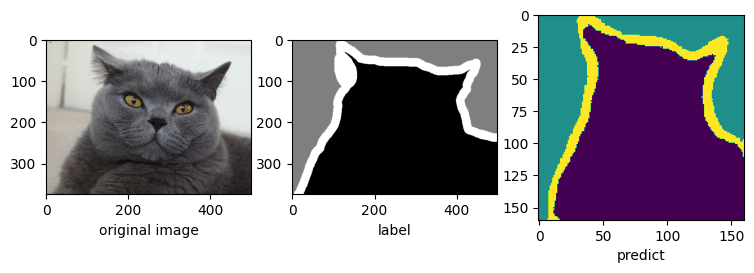

In [ ]:
import matplotlib.pyplot as plt
i = 50 # 검증 데이터의 50번째 이미지를 시각화합니다.
plt.figure(figsize=(9,3))
plt.subplot(1, 3, 1)
plt.imshow(plt.imread(val_input_img_paths[i])) # 입력 이미지 시각화
plt.xlabel('original image')

plt.subplot(1, 3, 2)
img = PIL.ImageOps.autocontrast(load_img(val_target_img_paths[i])) # 실제 레이블 시각화
plt.imshow(img)
plt.xlabel('label')

plt.subplot(1, 3, 3)
plt.imshow(display_mask(i))  # 예측된 마스크 시각화
plt.xlabel('predict')
plt.show()

### 생각해보기 : 예측된 마스크는 왜 원본 이미지와 크기가 다를까요?